# Dataset 1: analysis

In [3]:
import numpy as np
import scipy
from scipy import signal as sig
from matplotlib import pyplot as plt
import os

%matplotlib inline

In [4]:
PATH = "../data/dataset/1"

In [5]:
#files = [file for file in os.listdir(PATH) if file.endswith(".nfc") and not "-3" in file]  # Taking only the first 2 recordings for each tag

all_files = [file for file in os.listdir(PATH) if file.endswith(".nfc")]
all_files.sort()

In [6]:
# RF constants
SAMP_RATE = 768000
CENTER_FREQ = int(13.56e6)
NFFT = 1024

In [7]:
# Read all signals with their filename
signals = []

for file in all_files:
    signal = np.fromfile(os.path.join(PATH, file), dtype=scipy.complex64)
    name = file[:-4]
    signals.append((name, signal))

## Signal characteristics

In [6]:
stats = []

for signal in signals:
    mags = np.abs(signal[1][100000:200000])
    stats.append(scipy.stats.describe(mags))

In [7]:
print("Number of points", len(signals[0][1]))
for idx, stat in enumerate(stats):
    print("Signal", idx + 1, "---------------------------------------------------")
    print("Min and max:", stat.minmax, "mean:", stat.mean)
    print("Variance:", stat.variance, "skewness:", stat.skewness)
    print("------------------------------------------------------------")

Number of points 2304000
Signal 1 ---------------------------------------------------
Min and max: (0.008753731, 0.27701747) mean: 0.25722504
Variance: 9.437275e-05 skewness: -13.7332763671875
------------------------------------------------------------
Signal 2 ---------------------------------------------------
Min and max: (0.0024729331, 0.27810112) mean: 0.25588027
Variance: 0.00010404476 skewness: -13.30904769897461
------------------------------------------------------------
Signal 3 ---------------------------------------------------
Min and max: (0.005446971, 0.27358472) mean: 0.2570303
Variance: 6.194619e-05 skewness: -17.370933532714844
------------------------------------------------------------
Signal 4 ---------------------------------------------------
Min and max: (0.25715828, 0.25906962) mean: 0.2580336
Variance: 2.4320798e-07 skewness: 0.016133371740579605
------------------------------------------------------------
Signal 5 --------------------------------------------

## Waterfall plots

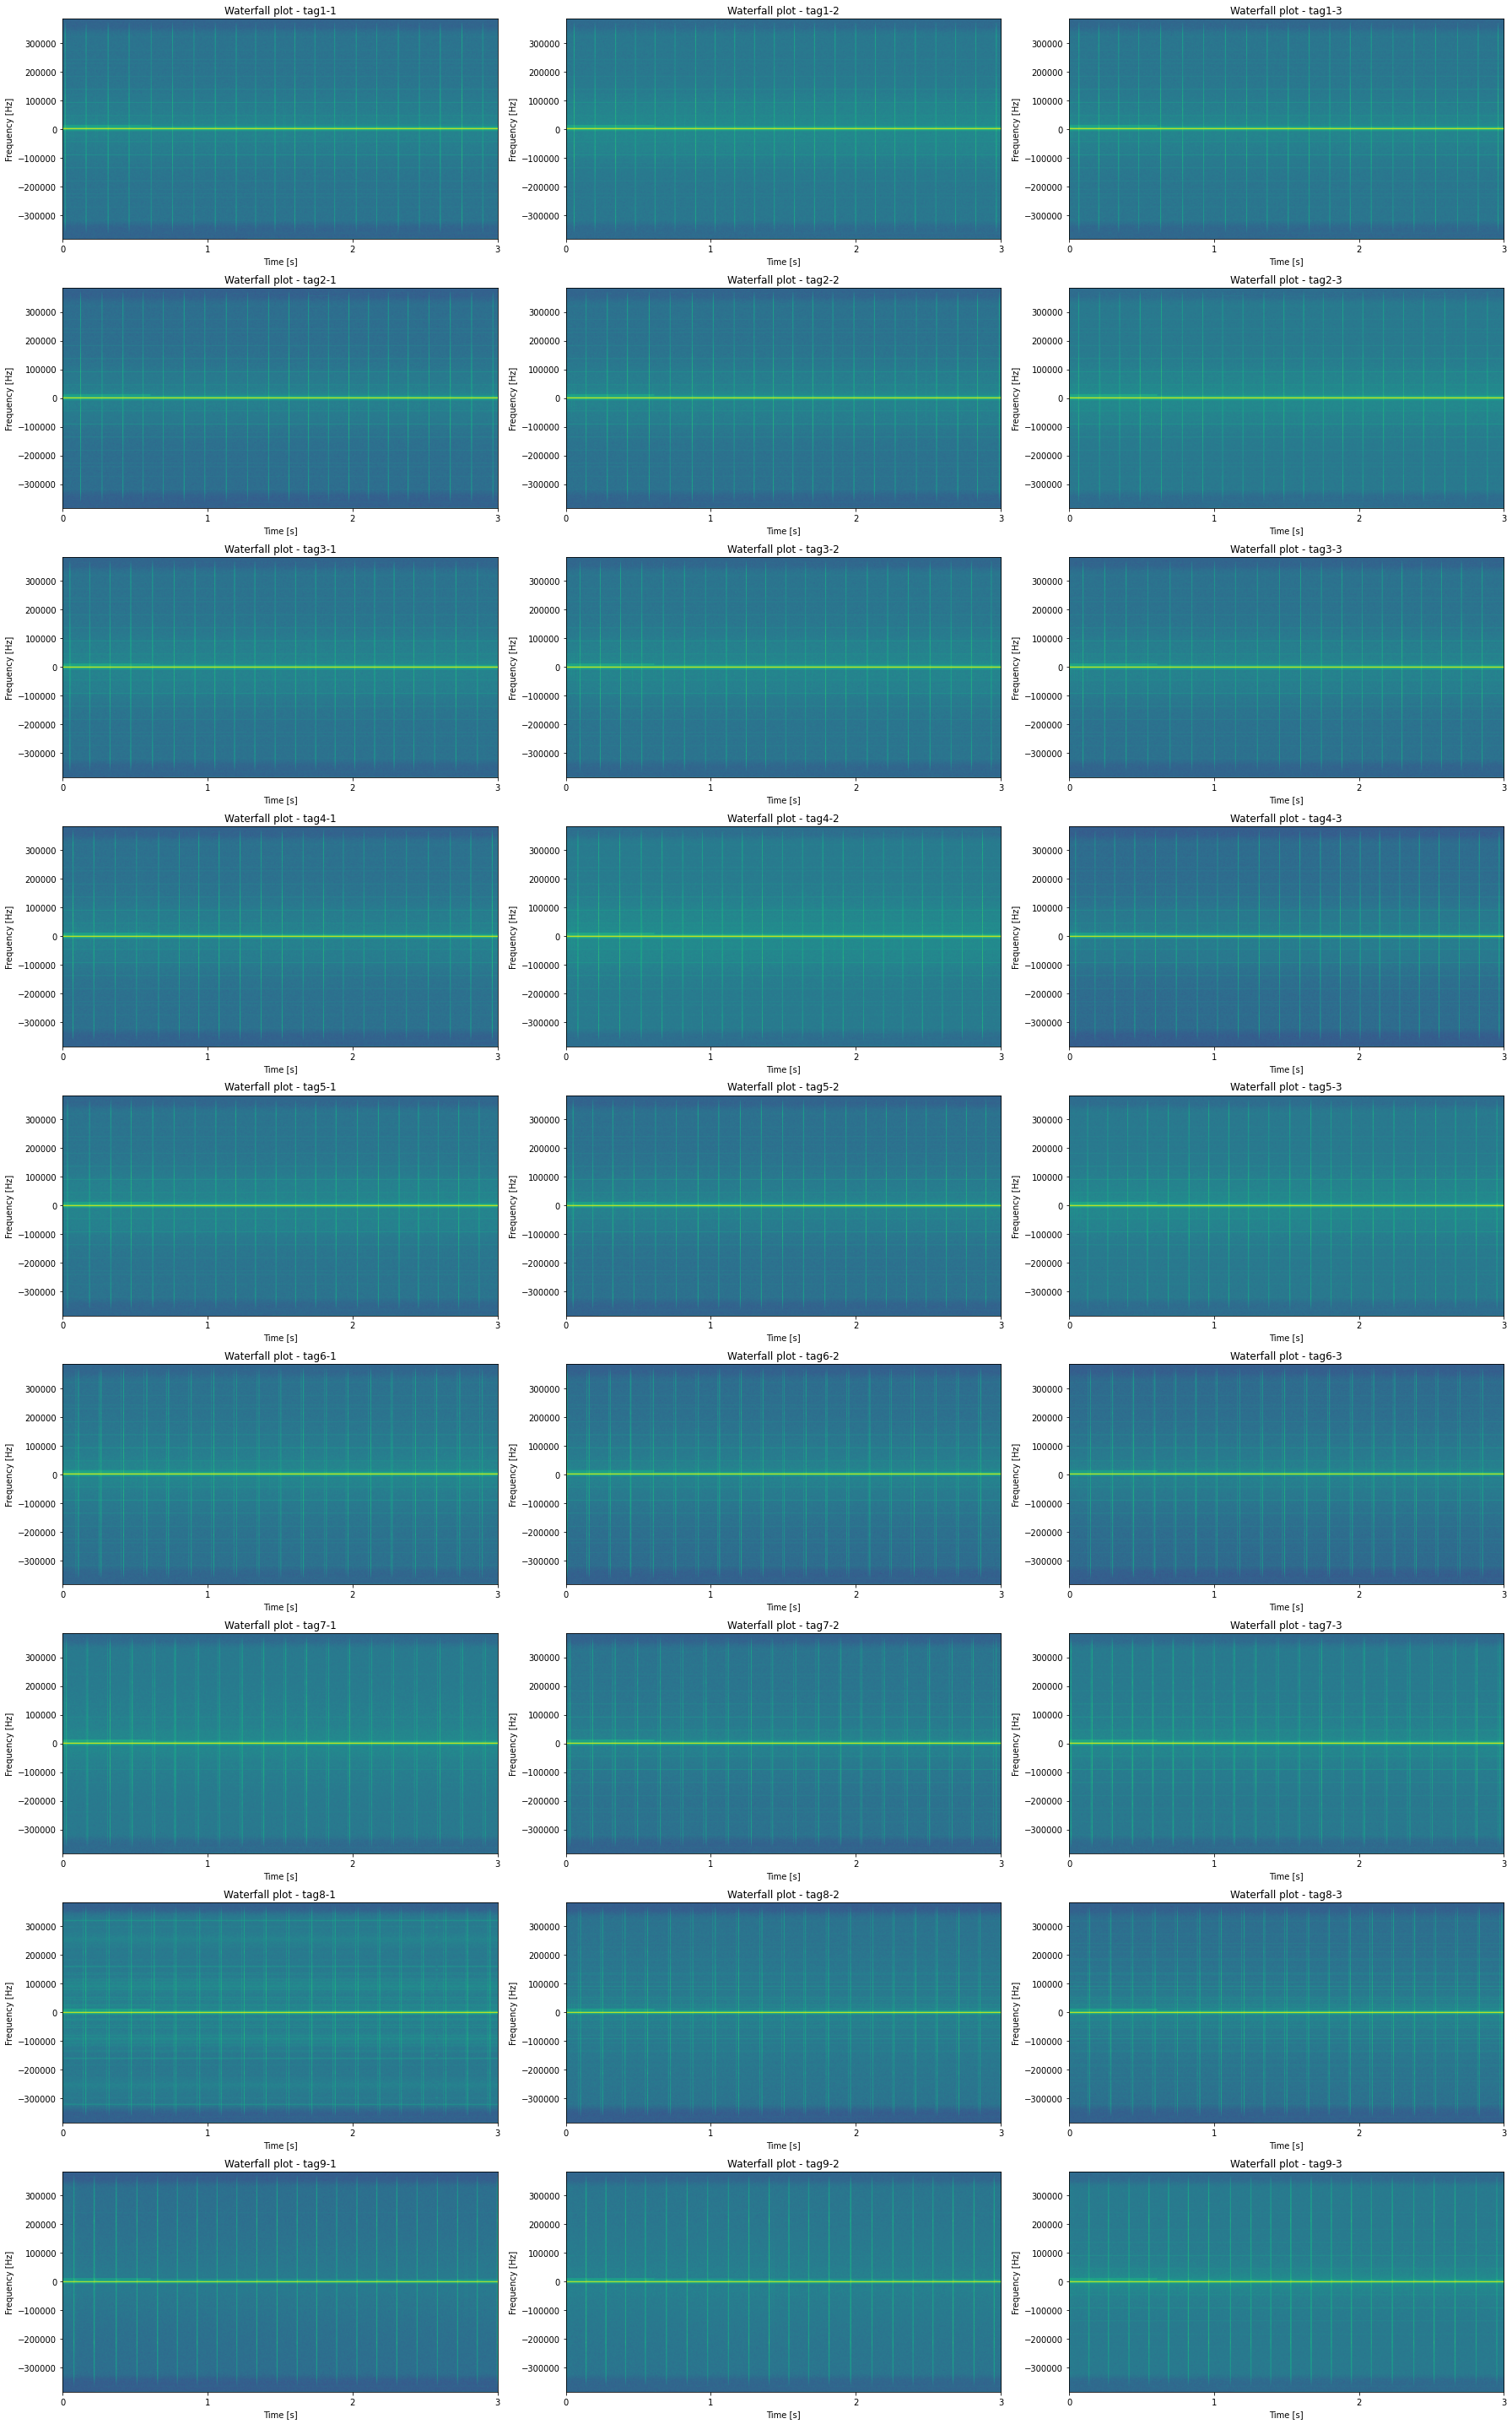

In [8]:
fig, axs = plt.subplots(len(signals) // 3, 3, figsize=(25, 40))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.specgram(signal[1], NFFT=NFFT, Fs=SAMP_RATE)
    ax.set_title("Waterfall plot - {}".format(signal[0]))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Frequency [Hz]")
    ax.set_xticks(range(0, 4))

plt.tight_layout()
plt.show()

## PSDs

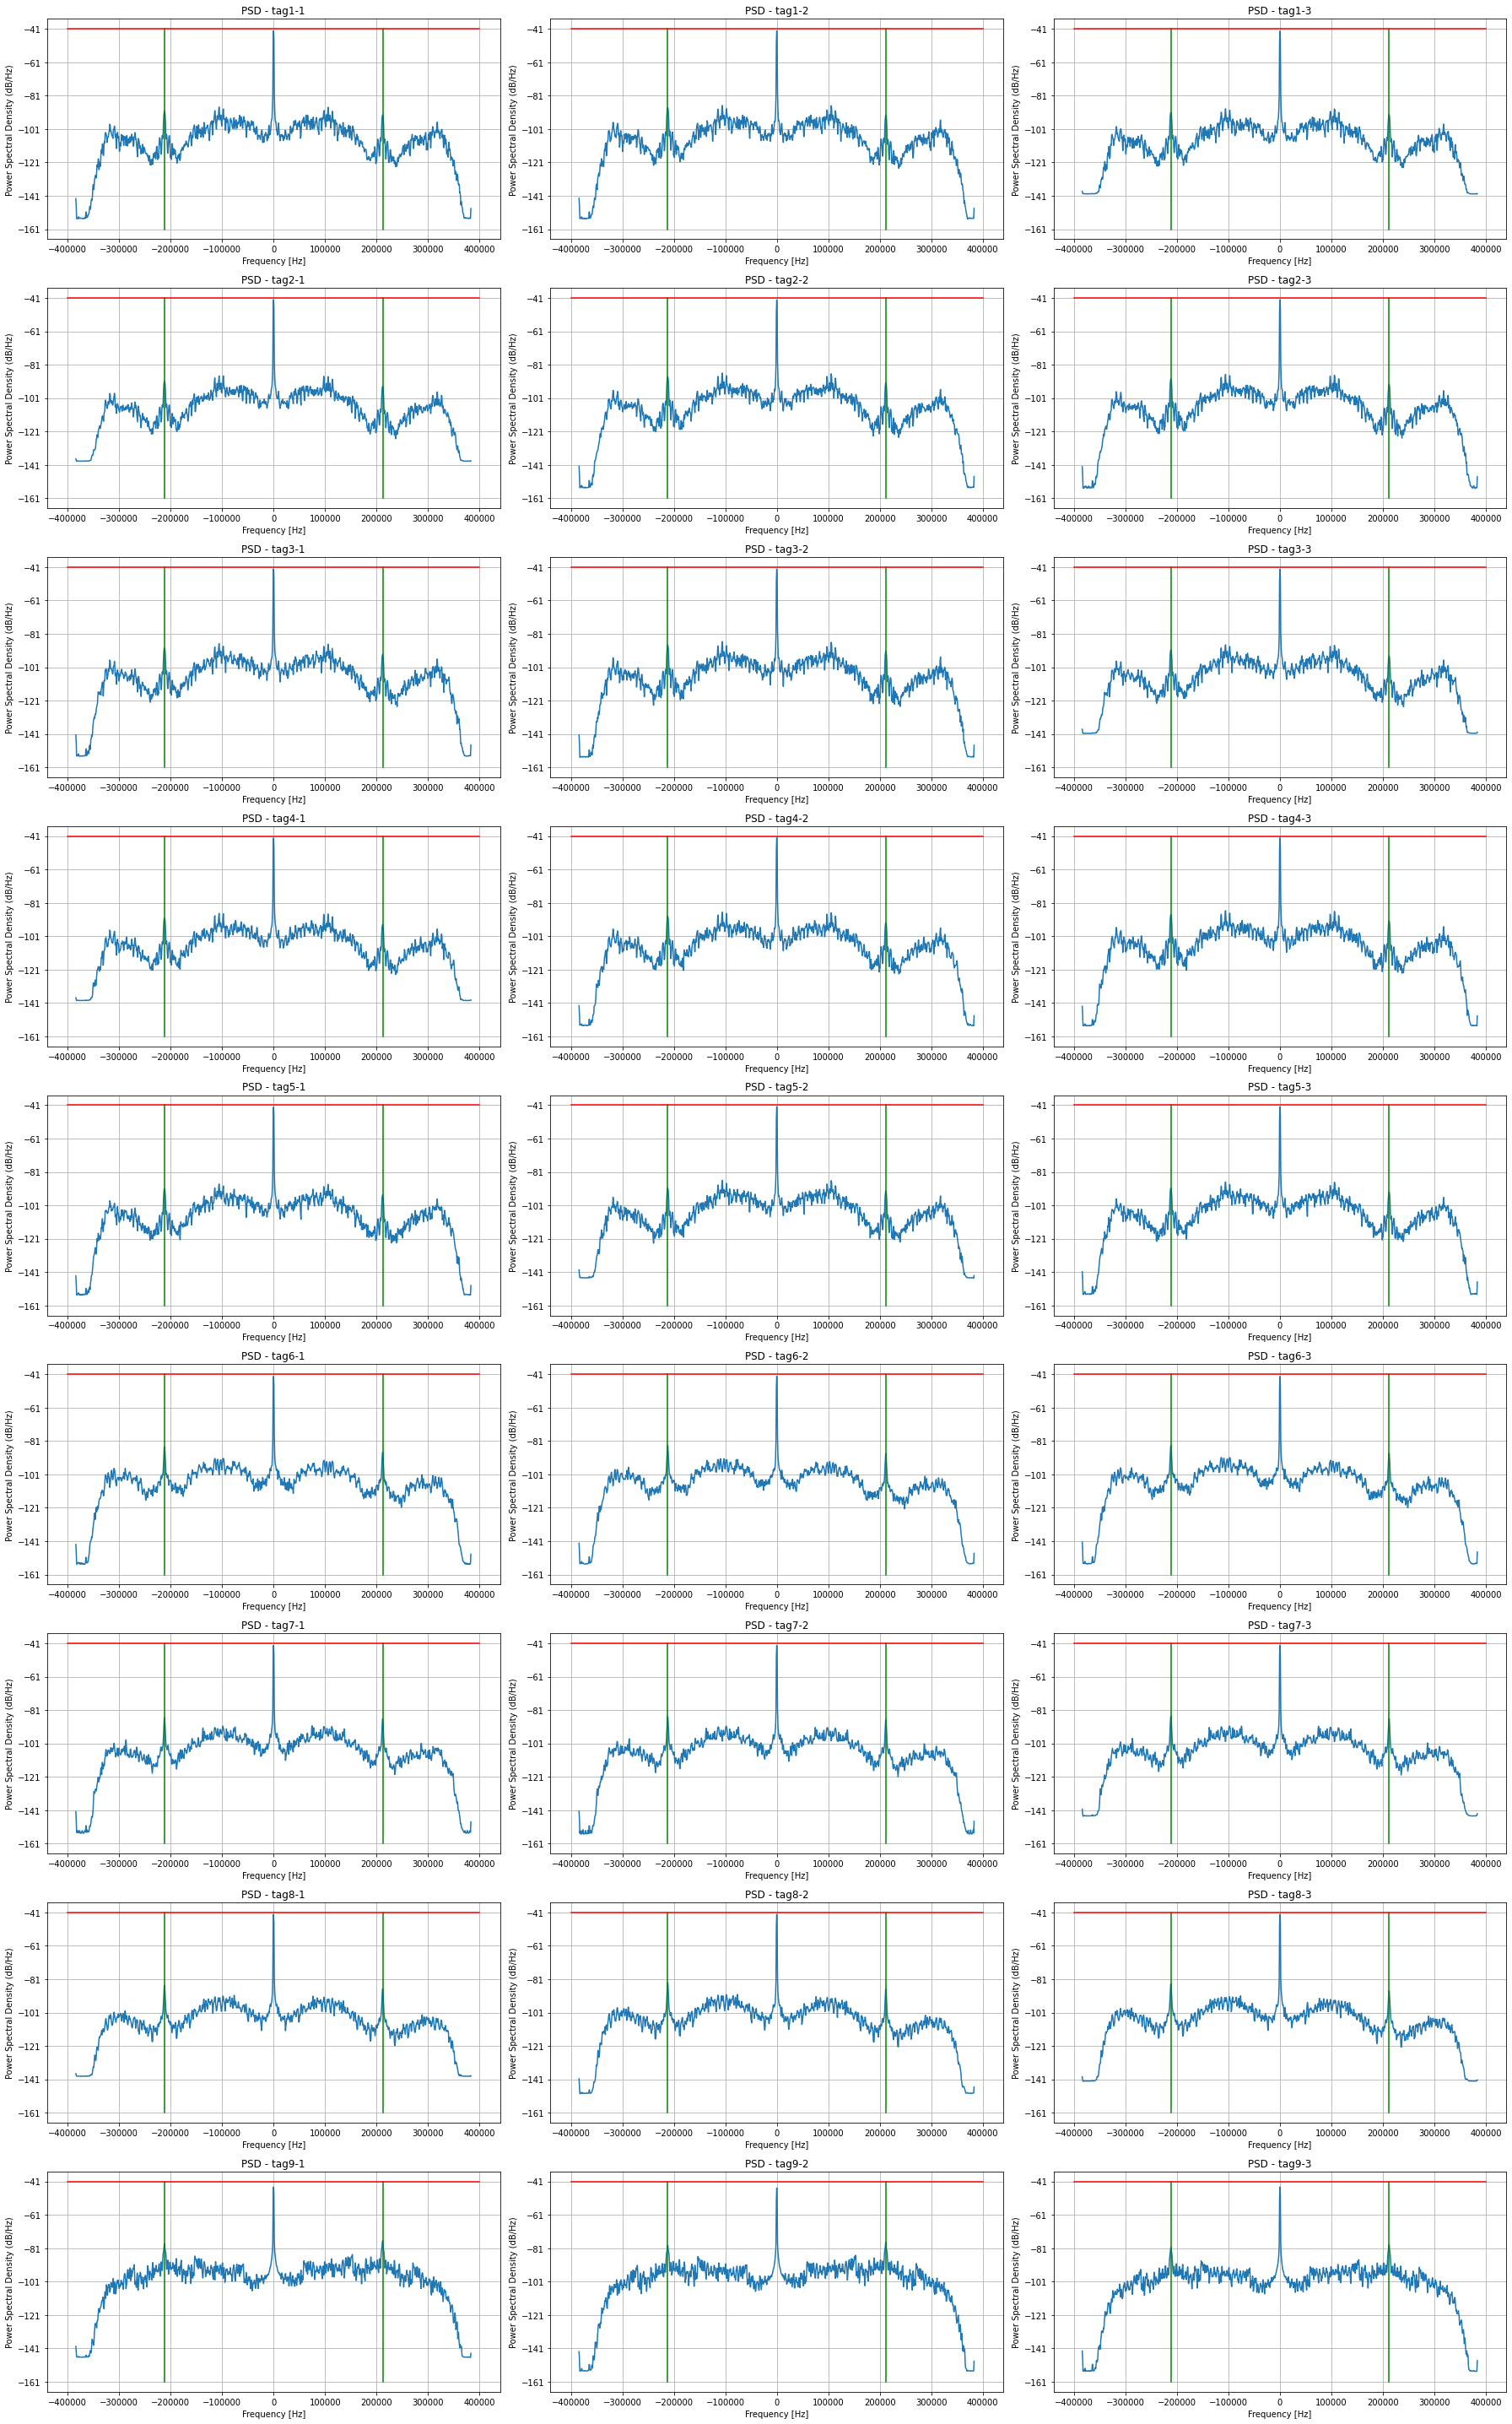

In [9]:
fig, axs = plt.subplots(len(signals) // 3, 3, figsize=(25, 40))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.psd(signal[1], NFFT=NFFT, Fs=SAMP_RATE)
    ax.plot([-212000, -212000], [-161, -41], 'g-')
    ax.plot([212000, 212000], [-161, -41], 'g-')

    ax.plot([-400000, 400000], [-41, -41], 'r-')
    #ax.plot([-400000, 400000], [-101, -101], 'r-')
    
    ax.set_yticks(range(-161, -21, 20))
    ax.set_xlabel("Frequency [Hz]")
    ax.set_title("PSD - {}".format(signal[0]))

plt.tight_layout()
plt.show()

## Extract of magnitudes

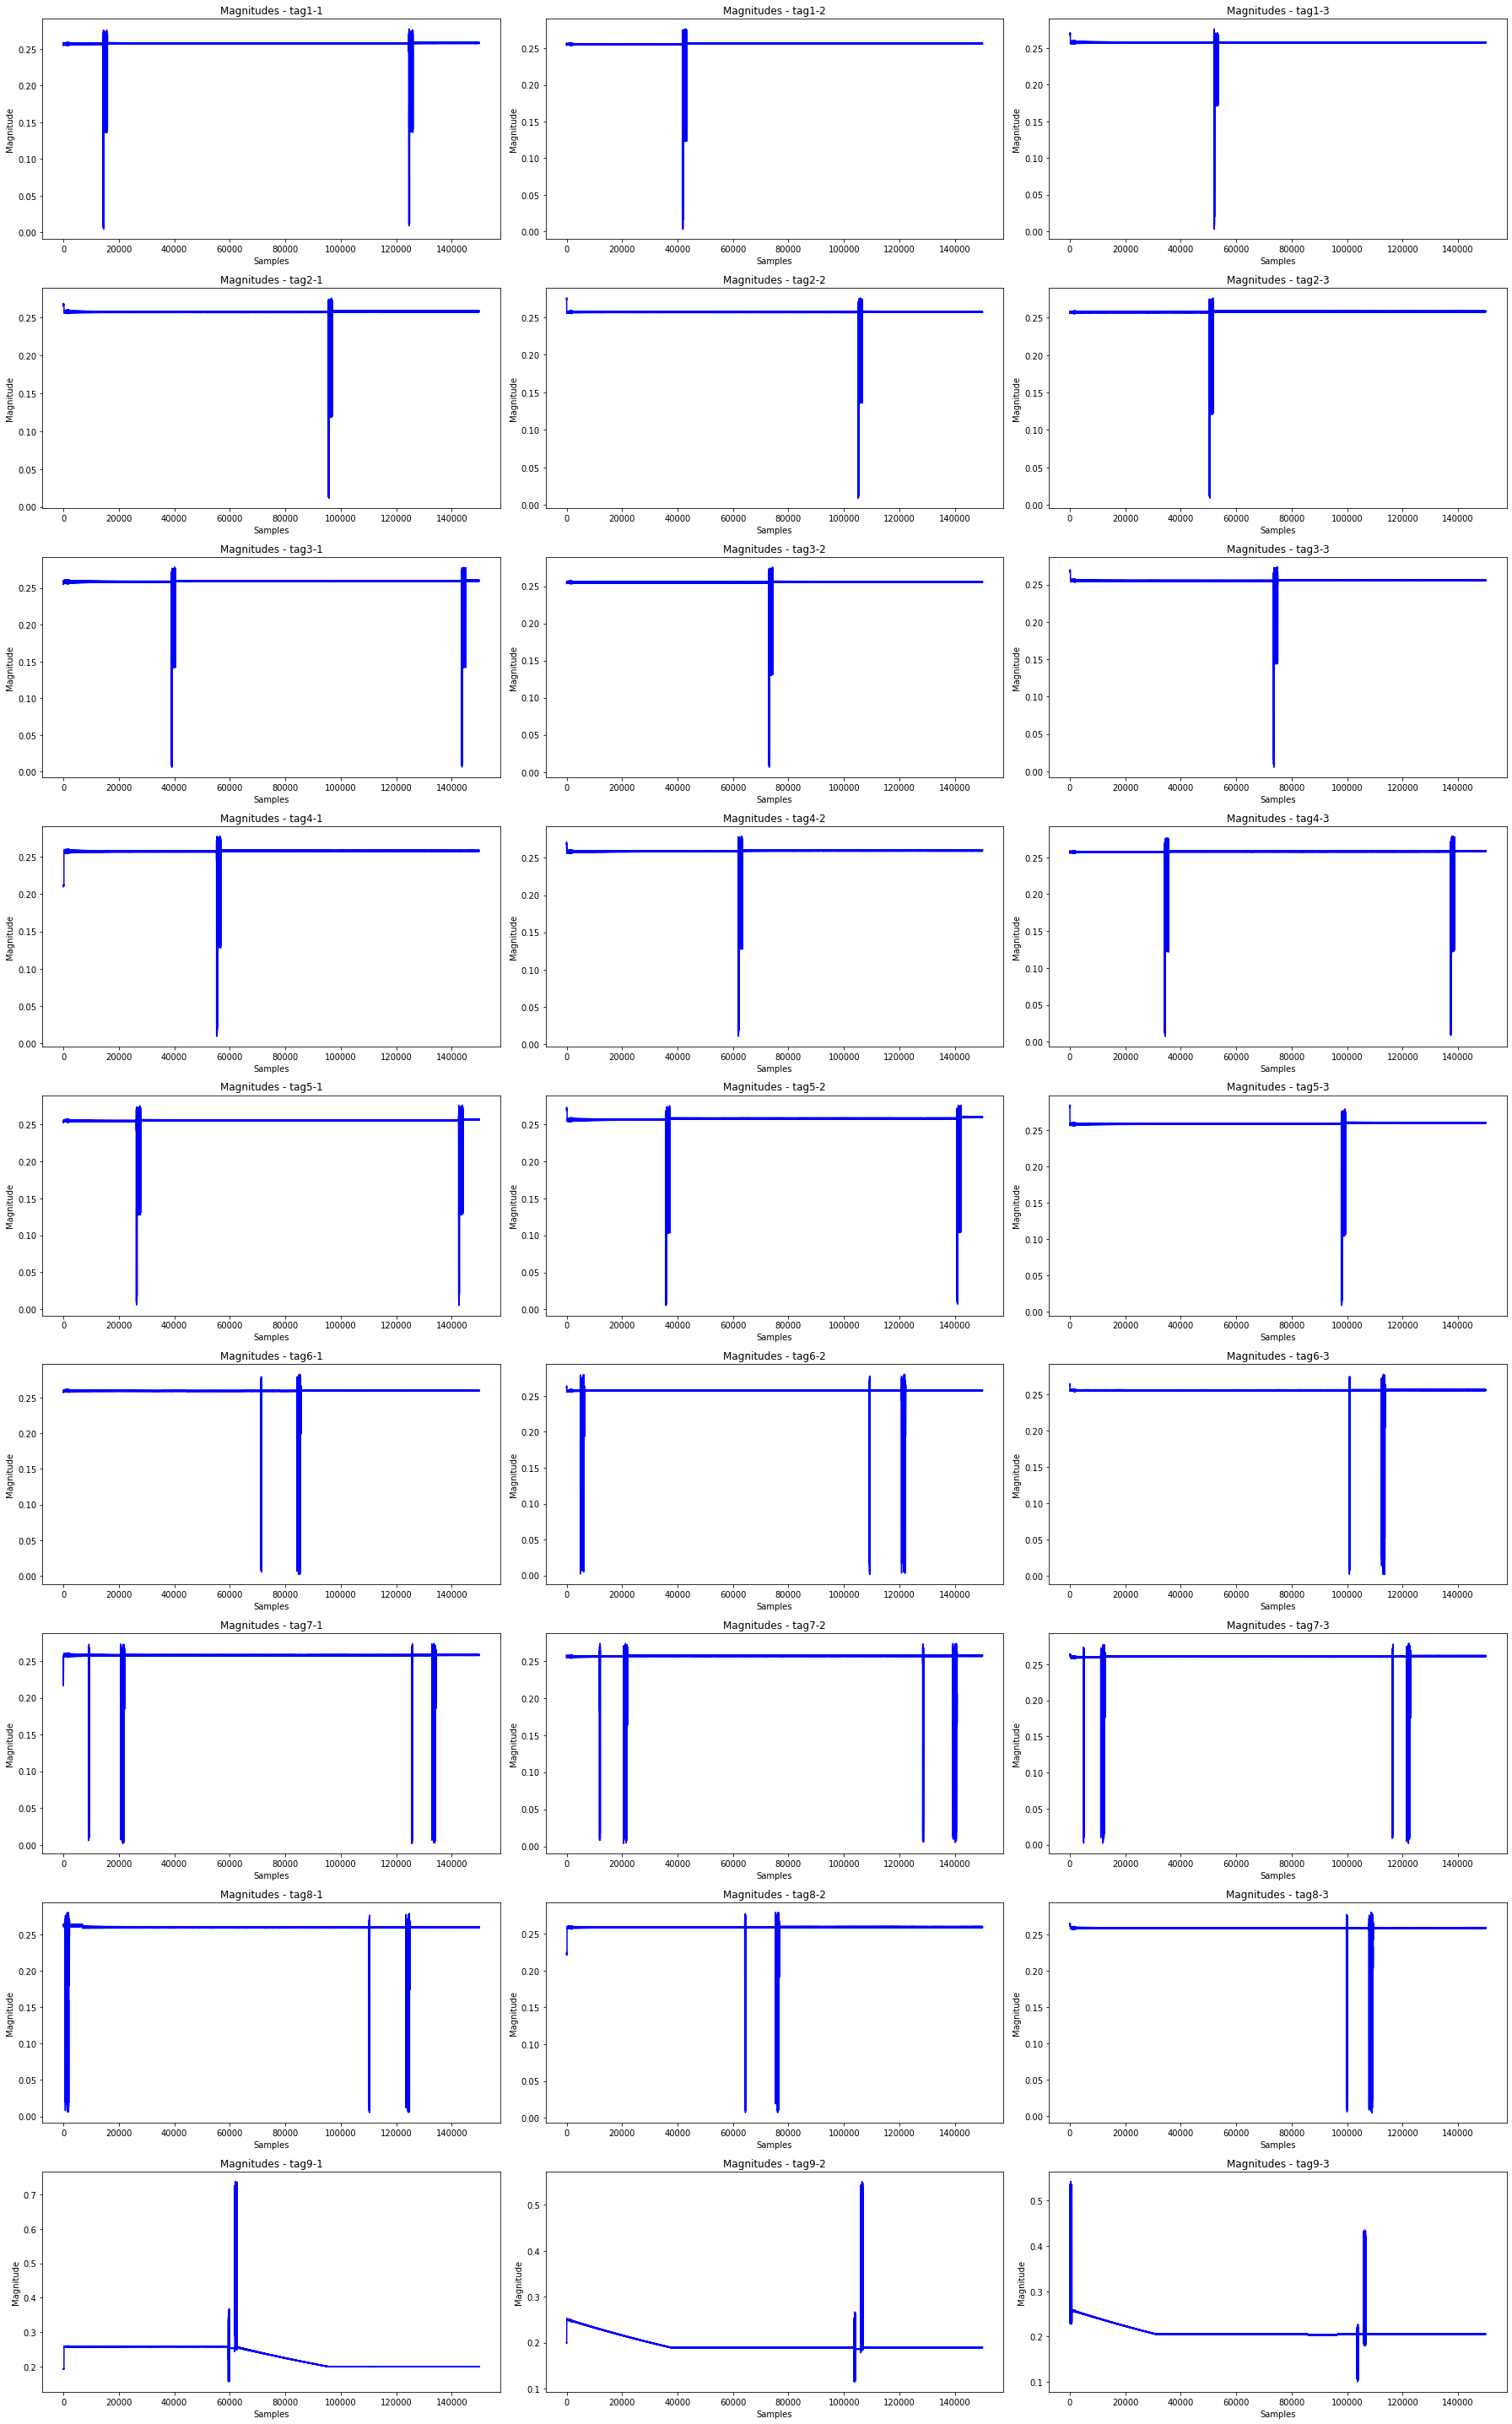

In [10]:
fig, axs = plt.subplots(len(signals) // 3, 3, figsize=(25, 40))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.plot(np.abs(signal[1][0:150000]), 'b-')
    ax.set_xlabel("Samples")
    ax.set_ylabel("Magnitude")
    ax.set_title("Magnitudes - {}".format(signal[0]))

plt.tight_layout()
plt.show()

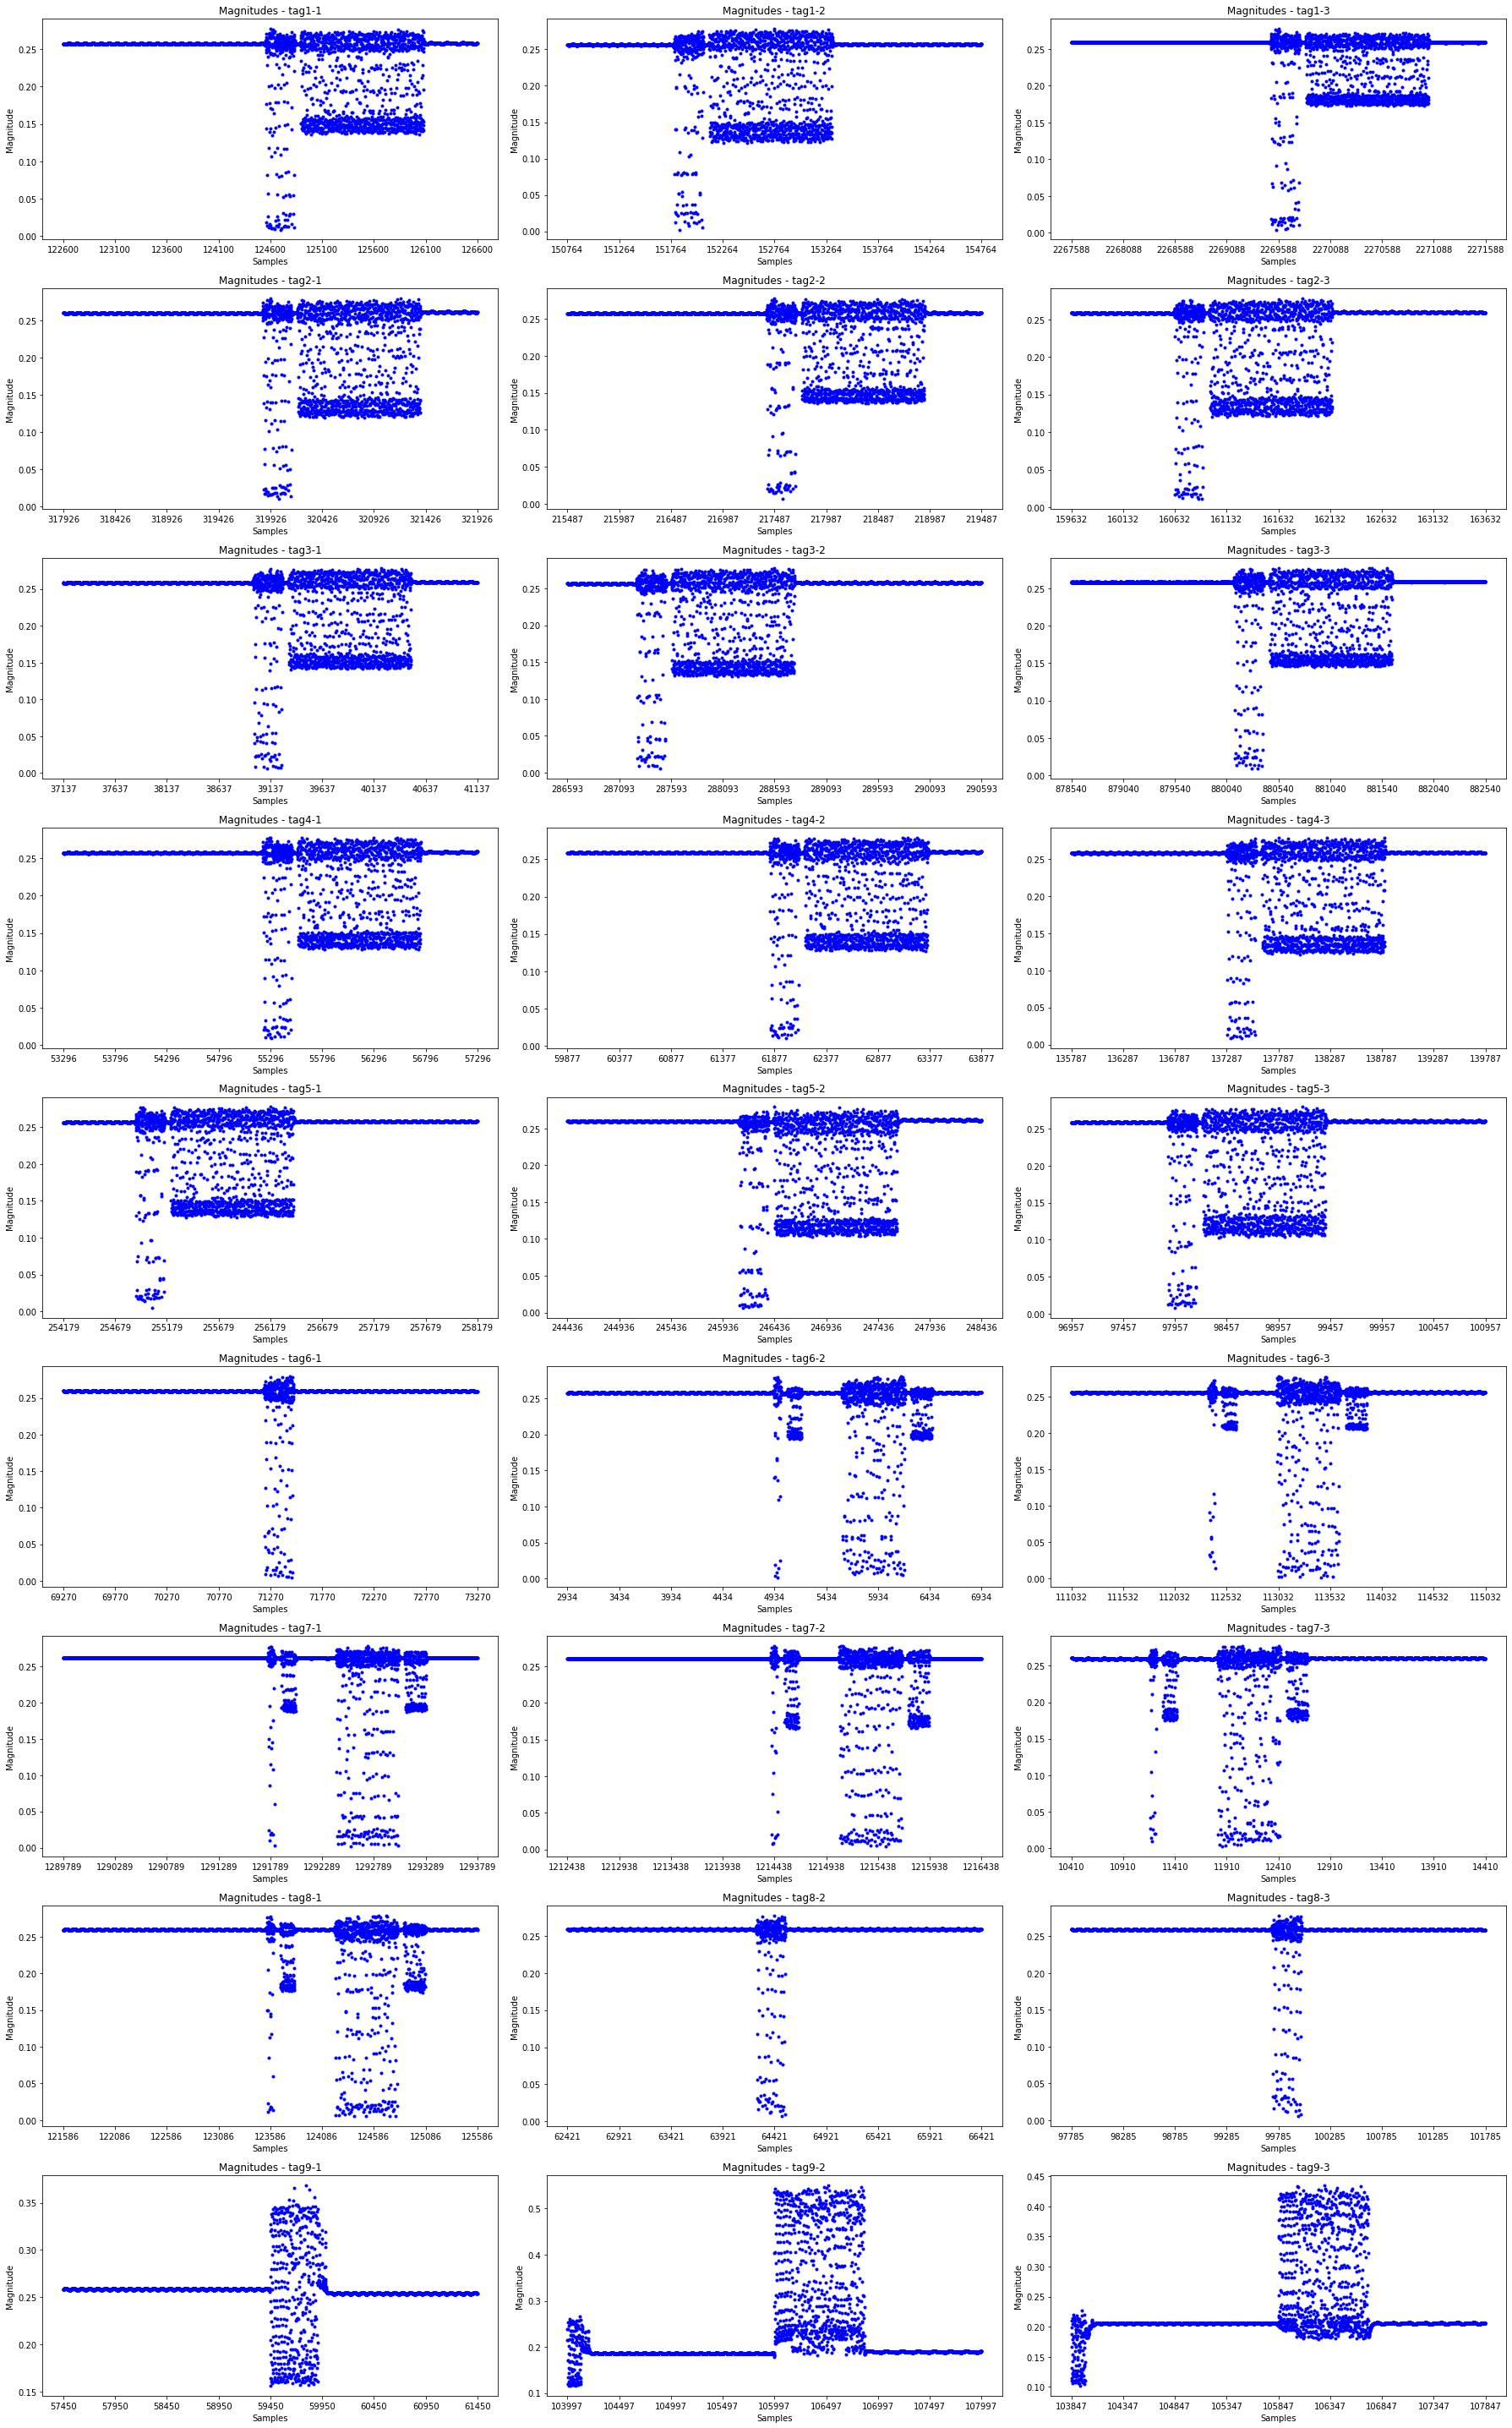

In [11]:
fig, axs = plt.subplots(len(signals) // 3, 3, figsize=(25, 40))

for signal, ax in (t for t in zip(signals, axs.flat)):
    mags = np.abs(signal[1])
    first_peak = sig.find_peaks(mags[2000:], height=0.277)[0][0] + 2000
    
    ax.plot(mags[first_peak-2000:first_peak+2000], 'b.')
    
    ax.set_xticklabels(range(first_peak - 2500, first_peak + 2001, 500))
    ax.set_xlabel("Samples")
    ax.set_ylabel("Magnitude")
    ax.set_title("Magnitudes - {}".format(signal[0]))

plt.tight_layout()
plt.show()

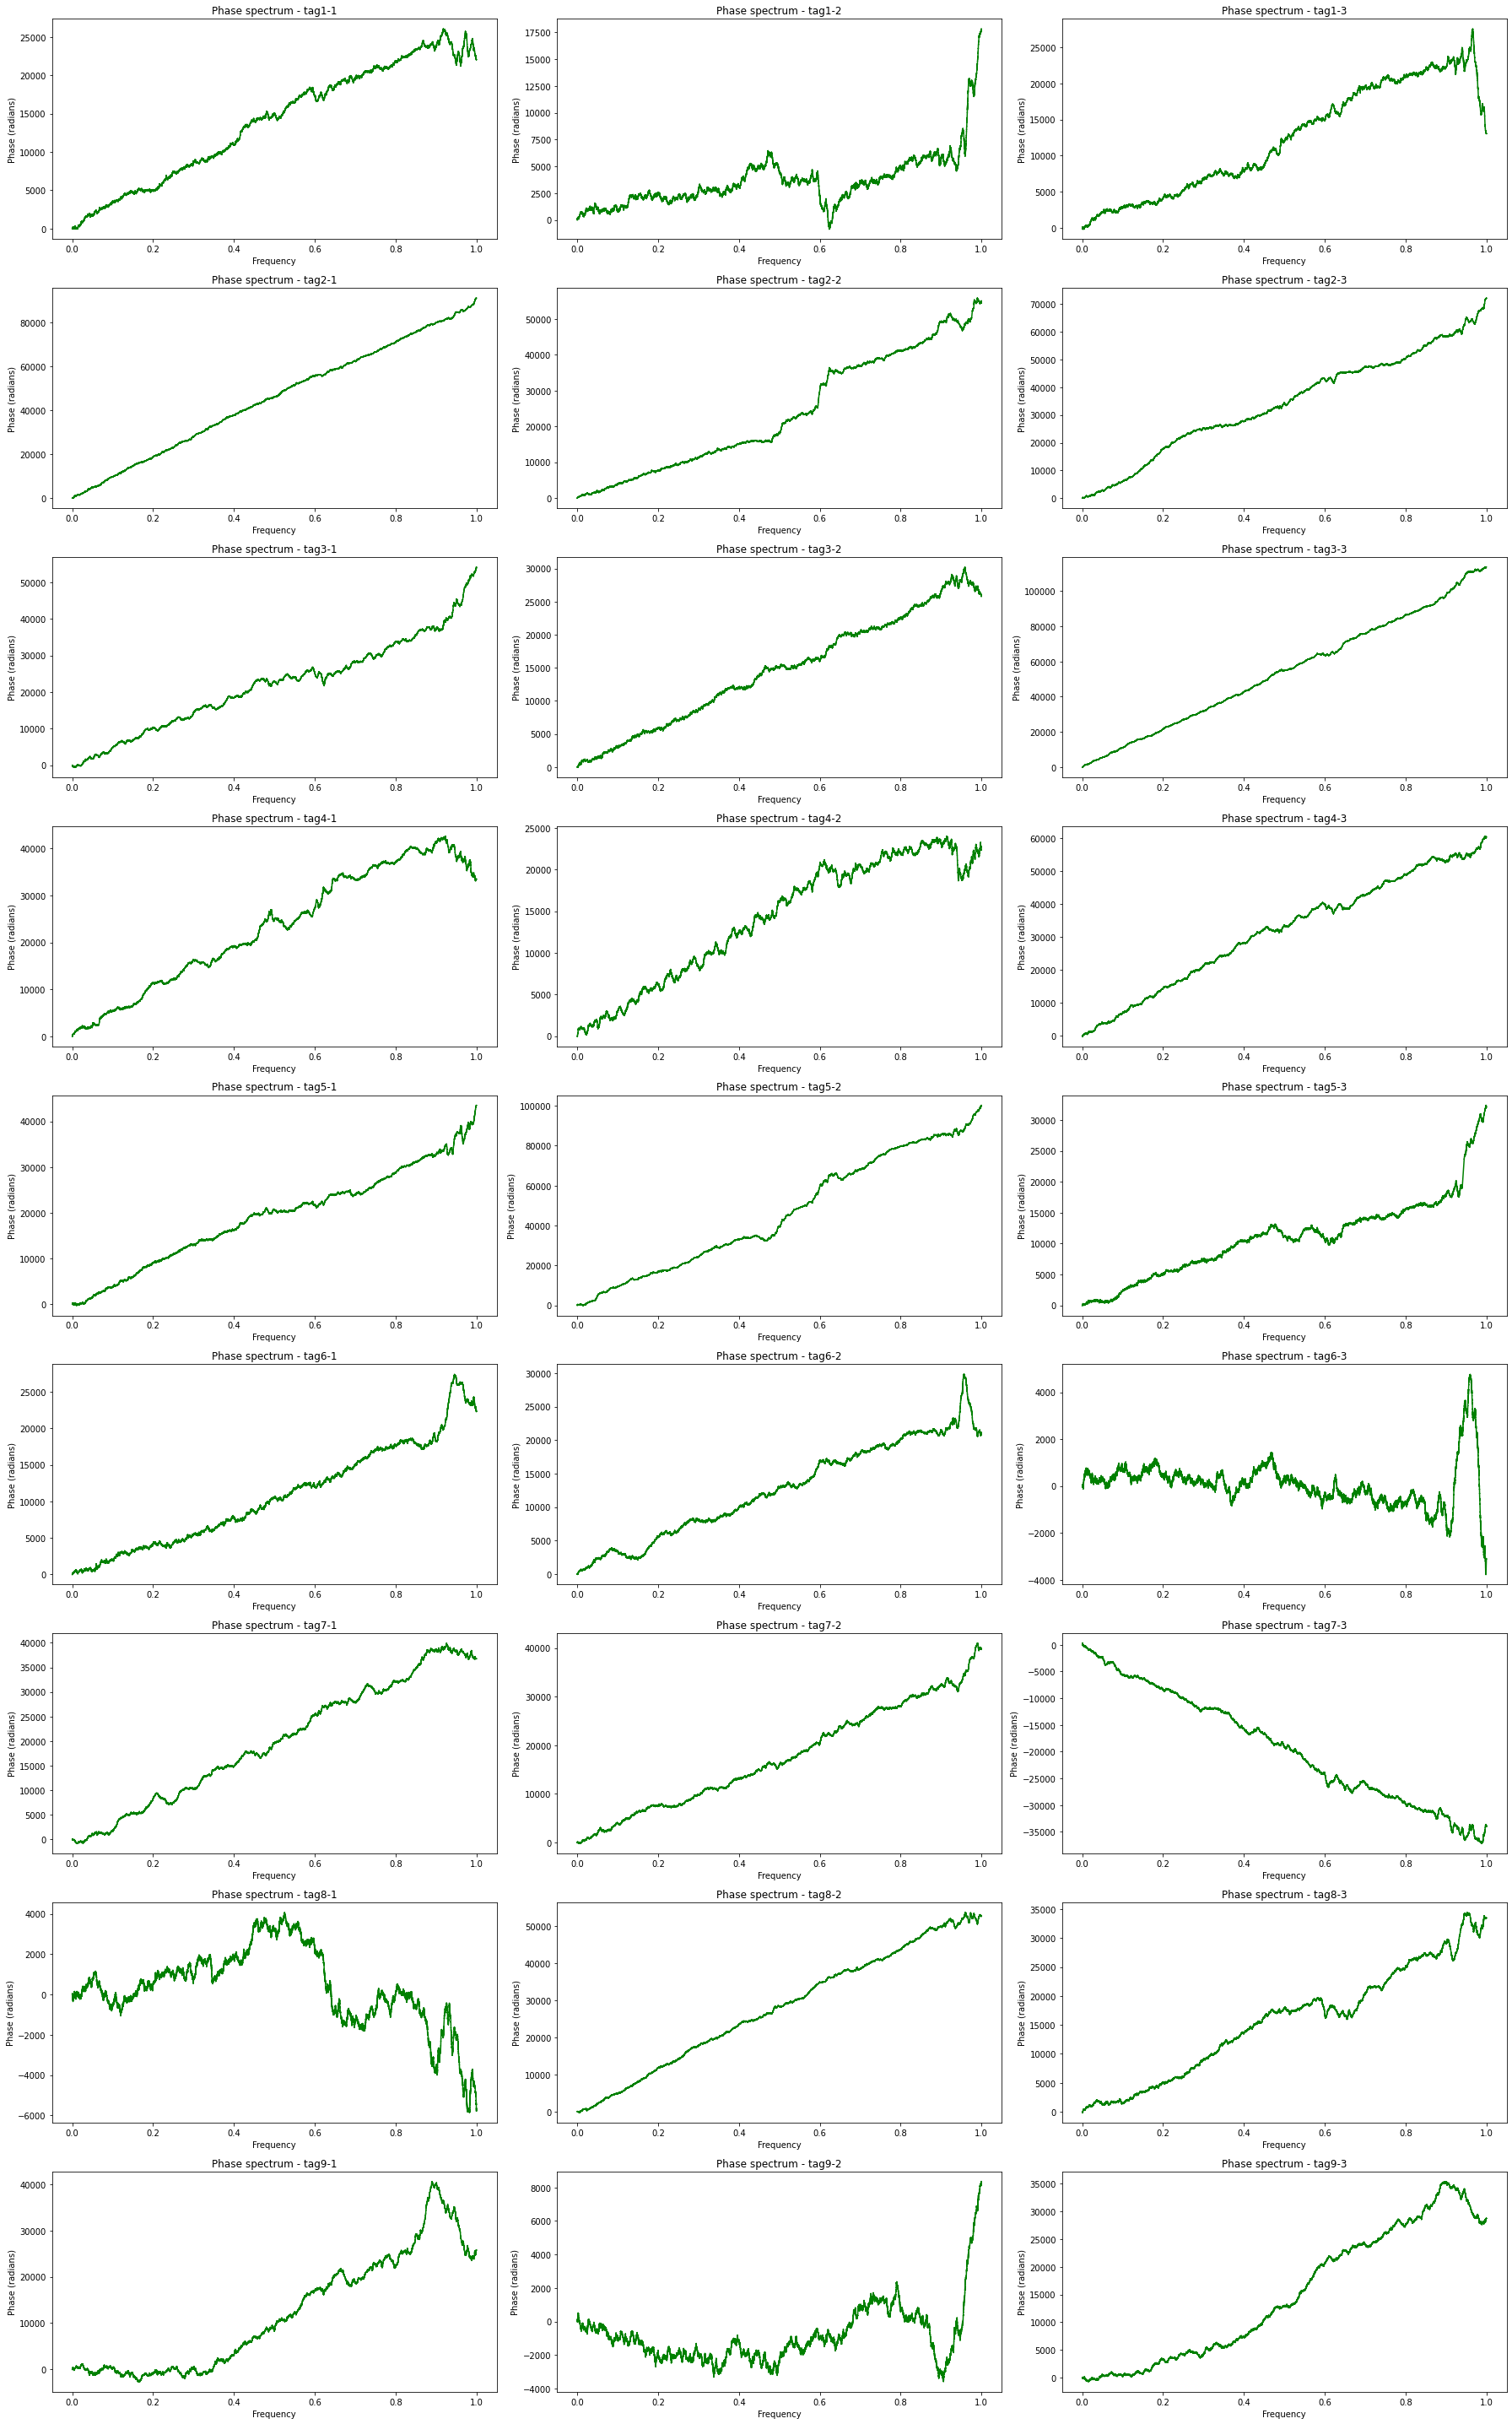

In [12]:
fig, axs = plt.subplots(len(signals) // 3, 3, figsize=(25, 40))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.phase_spectrum(np.abs(signal[1]), color ='green') 
    
    #ax.set_yticks(range(-161, -21, 20))
    #ax.set_xlabel("Frequency [Hz]")
    ax.set_title("Phase spectrum - {}".format(signal[0]))

plt.tight_layout()
plt.show()

## Peak detection

In [13]:
def signal_power(signal):
    """Return the RF power of the signal TODO
    Considering a 50 ohms impedance system (like most RF systems)
    """
    power = pow(np.real(signal), 2) + pow(np.imag(signal), 2)
    db = 10 * np.log10(power)
    return db

In [14]:
def test_peaks(mags):
    peaks1 = sig.find_peaks(-mags, height=-0.2)
    peaks_repr1 = [x for i, x in enumerate(-mags) if i in peaks1[0]]

    peaks2 = sig.find_peaks(-mags, threshold=0.022)
    peaks_repr2 = [x for i, x in enumerate(-mags) if i in peaks2[0]]

    peaks3 = sig.find_peaks(-mags, prominence=0.05)
    peaks_repr3 = [x for i, x in enumerate(-mags) if i in peaks3[0]]

    #width and plateau_size are not appropriate

    print(len(peaks1[0]), len(peaks2[0]), len(peaks3[0]))

    plt.figure(figsize=(25, 10))
    plt.plot(-mags, 'b-')

    plt.plot(peaks1[0], peaks_repr1, 'rX', markersize=12)
    plt.plot(peaks2[0], peaks_repr2, 'kx', markersize=12)
    plt.plot(peaks3[0], peaks_repr3, 'yx', markersize=10)
    plt.show()

296 41 161


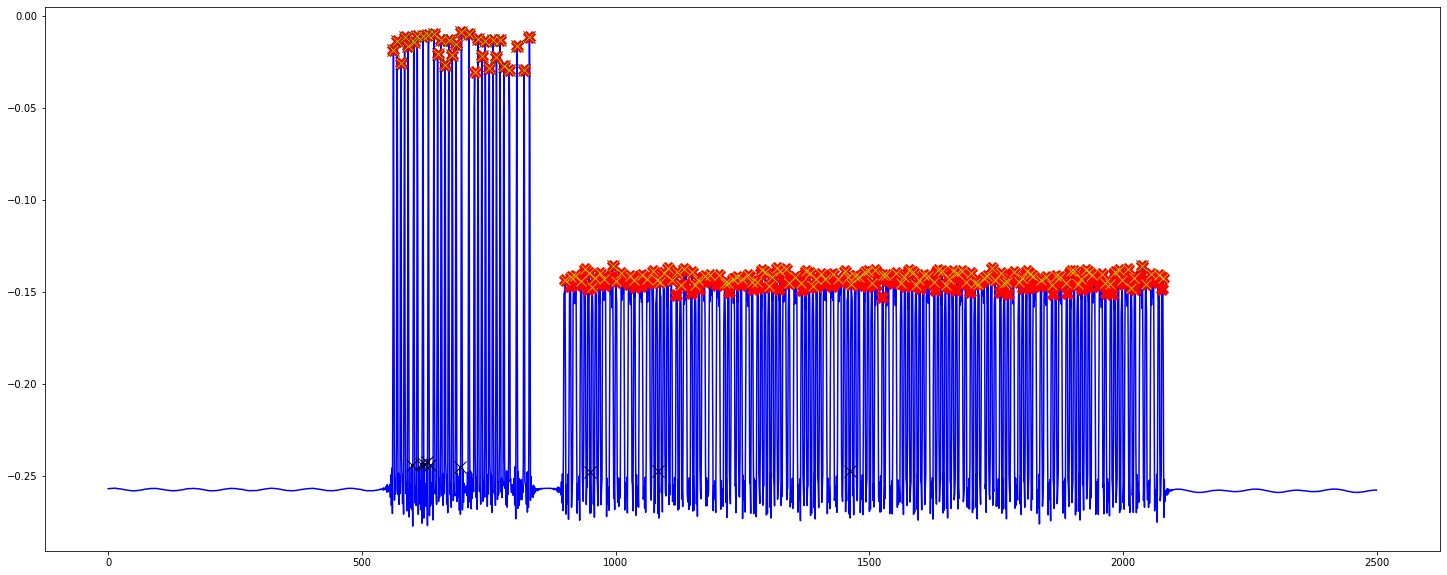

In [15]:
mags = np.abs(signals[0][1][124000:126500])
test_peaks(mags)

289 42 161


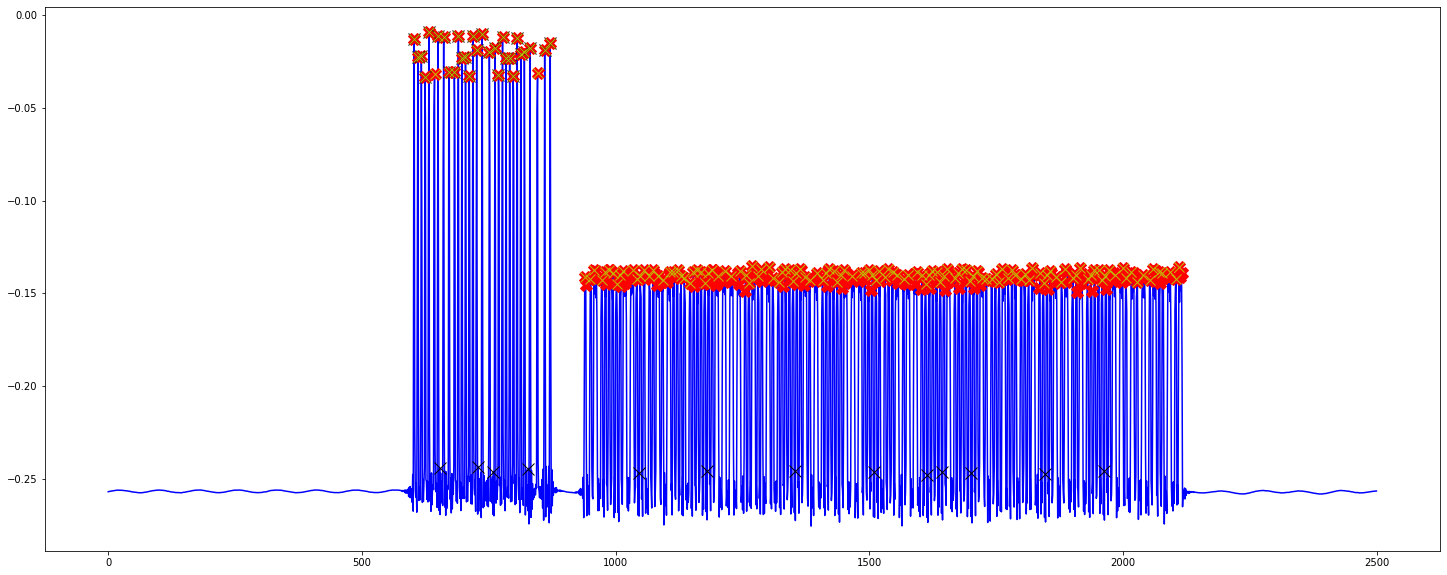

In [16]:
test_peaks(np.abs(signals[4][1][104500:107000]))

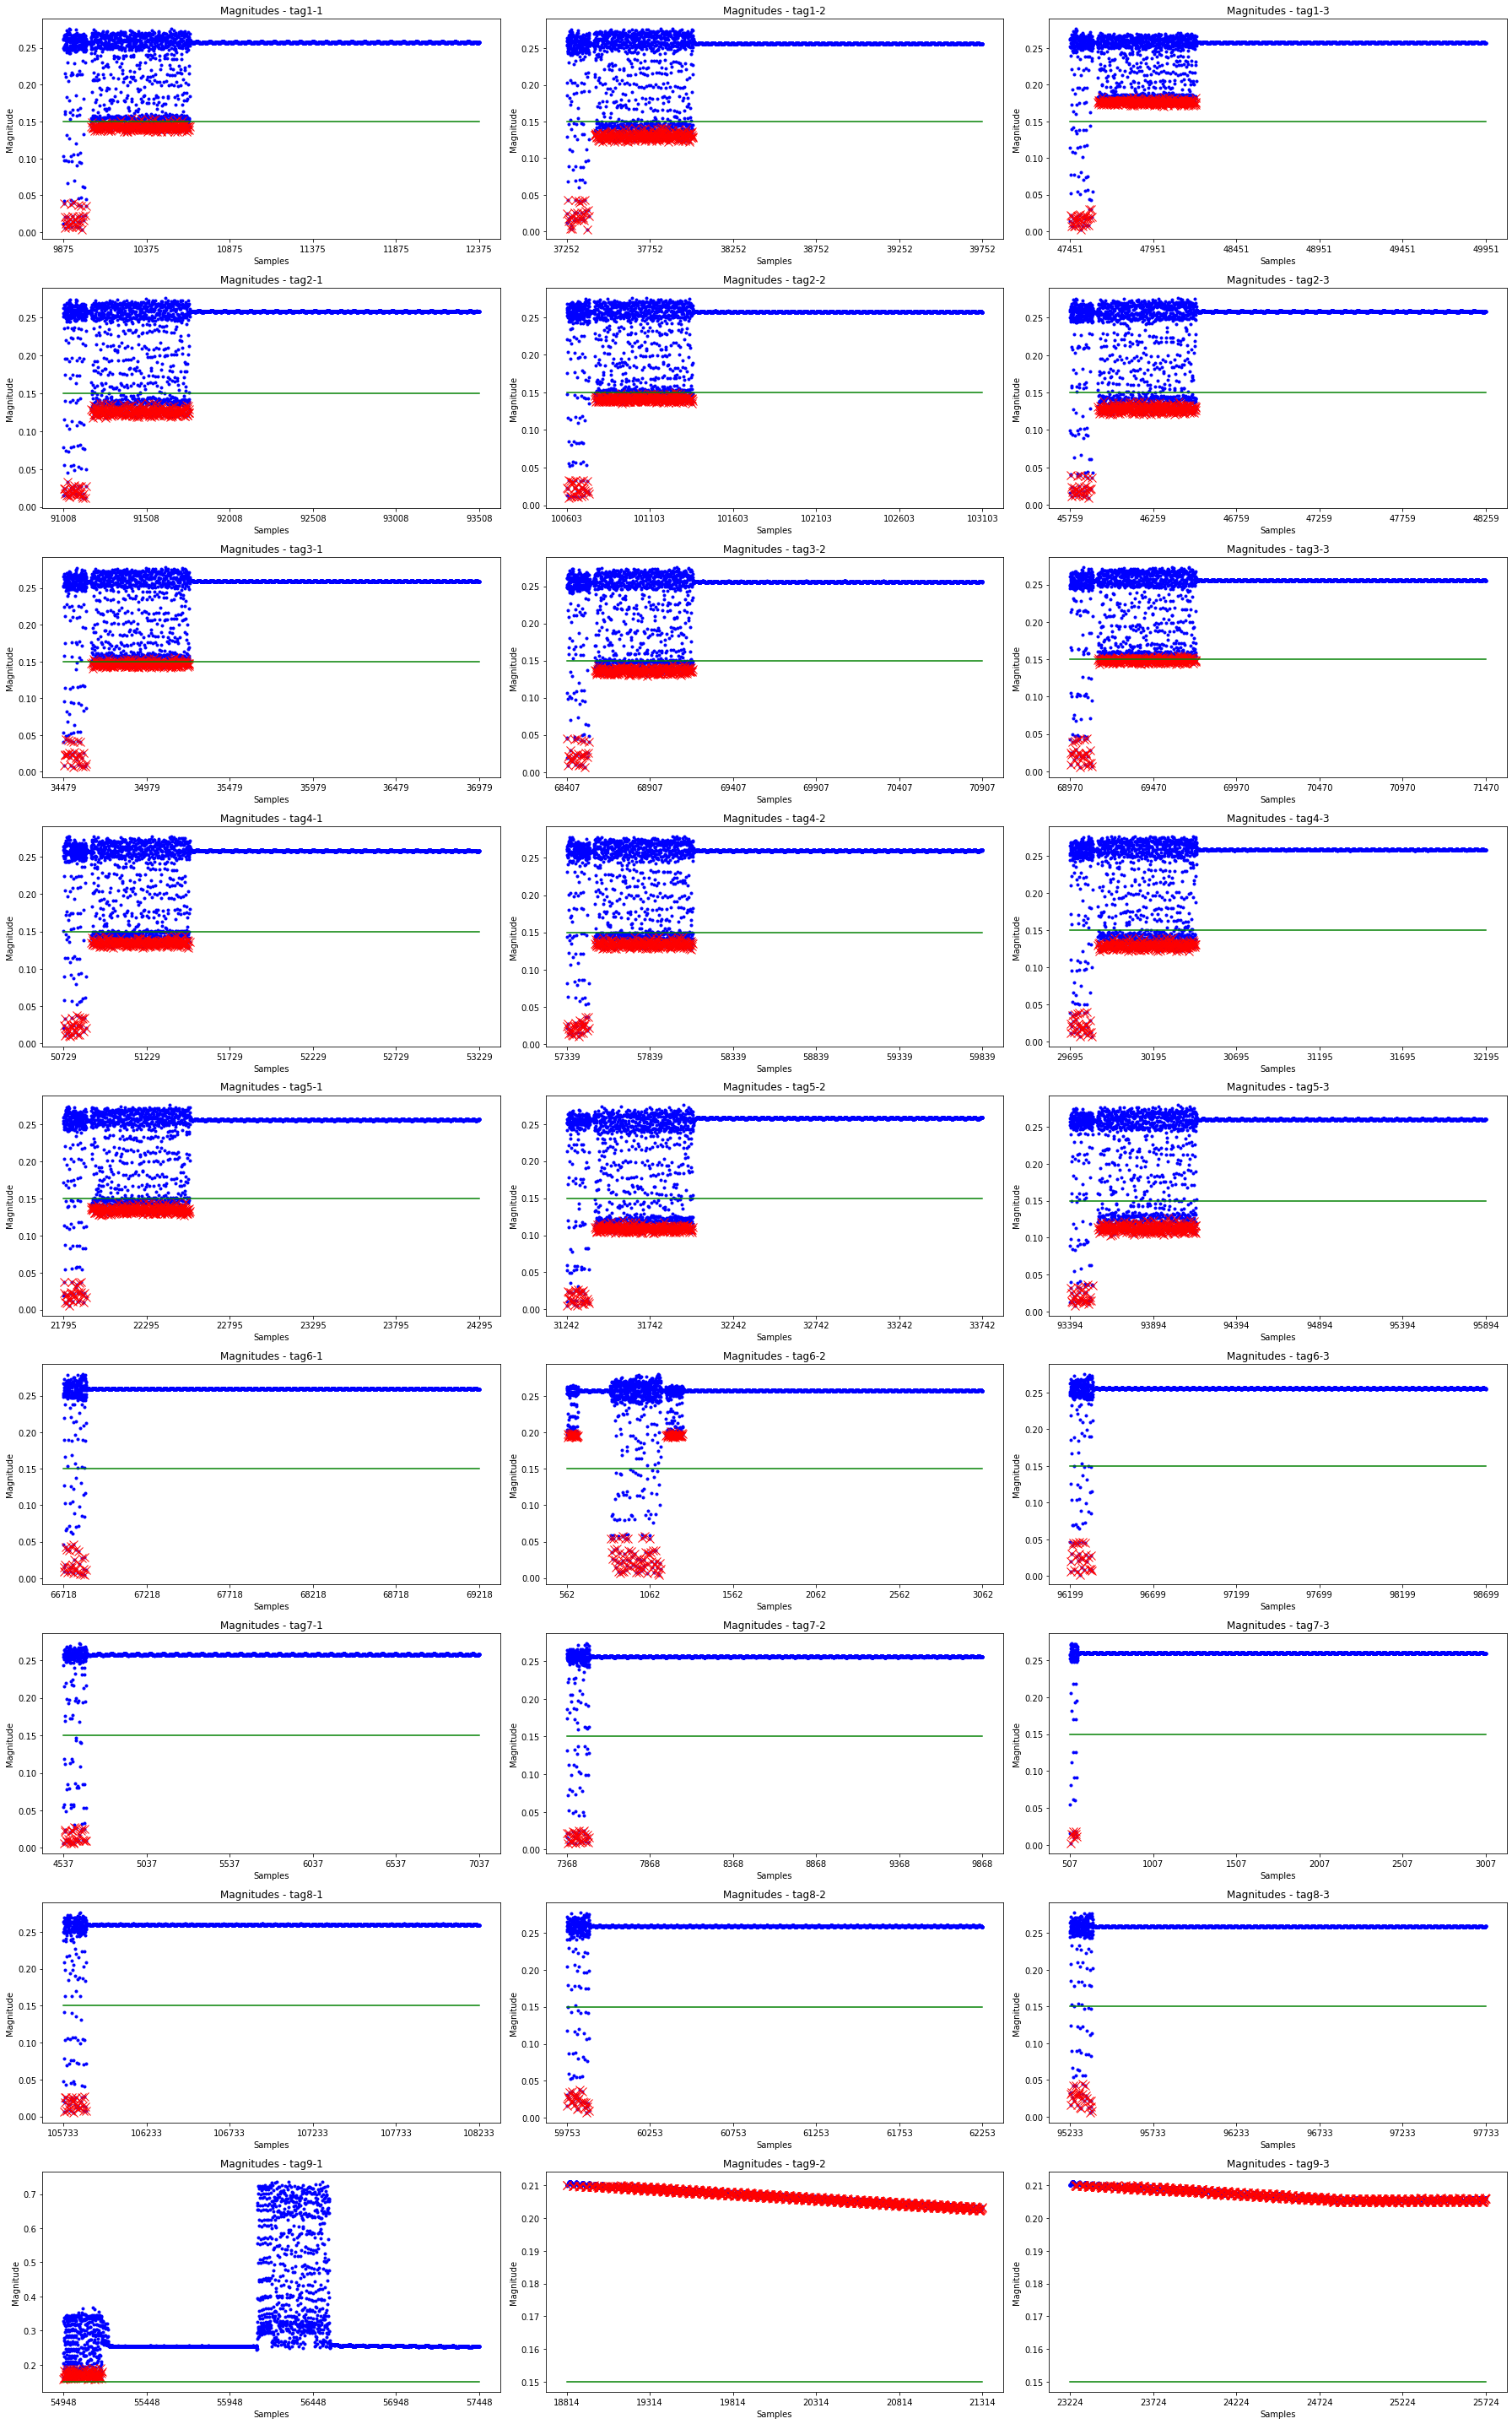

In [17]:
fig, axs = plt.subplots(len(signals) // 3, 3, figsize=(25, 40))

for signal, ax in (t for t in zip(signals, axs.flat)):
    mags = np.abs(signal[1])[5000:200000]
    peaks = sig.find_peaks(-mags, height=-0.21)
    fp = peaks[0][0]
    
    mags = mags[fp:fp + 5000]
    
    peaks = sig.find_peaks(-mags, height=-0.21)
    peaks_rep = [x for i, x in enumerate(mags) if i in peaks[0]]
    
    ax.plot(mags, 'b.')
    ax.plot(peaks[0], peaks_rep, 'rx', markersize=10)
    ax.plot([0, len(mags)], [0.15, 0.15], 'g-')
    
    ax.set_xticklabels(range(fp, fp + 5001, 500))
    ax.set_xlabel("Samples")
    ax.set_ylabel("Magnitude")
    ax.set_title("Magnitudes - {}".format(signal[0]))

plt.tight_layout()
plt.show()

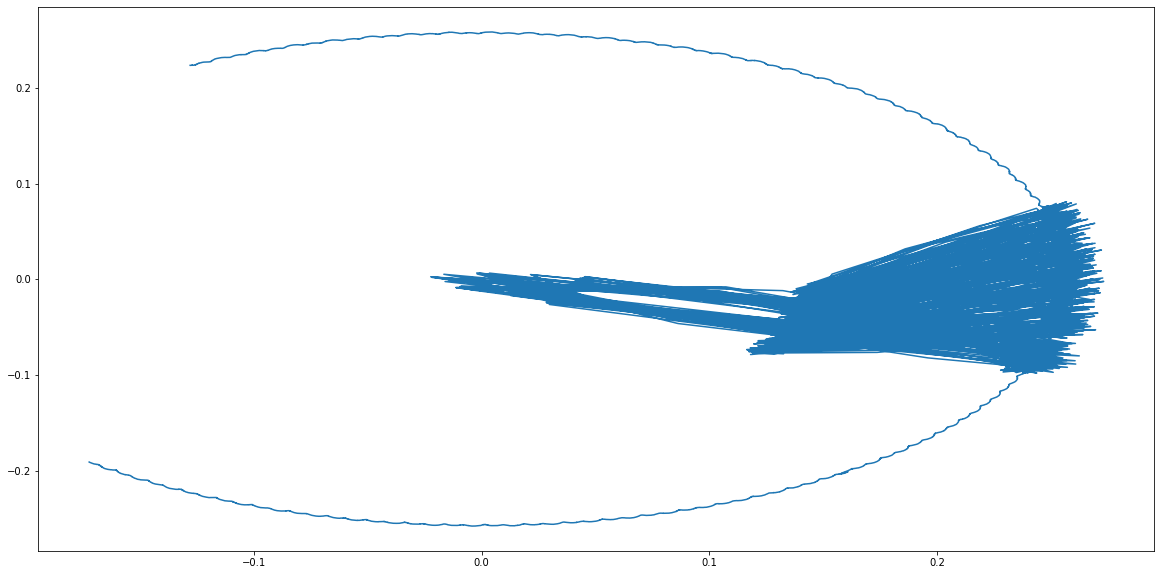

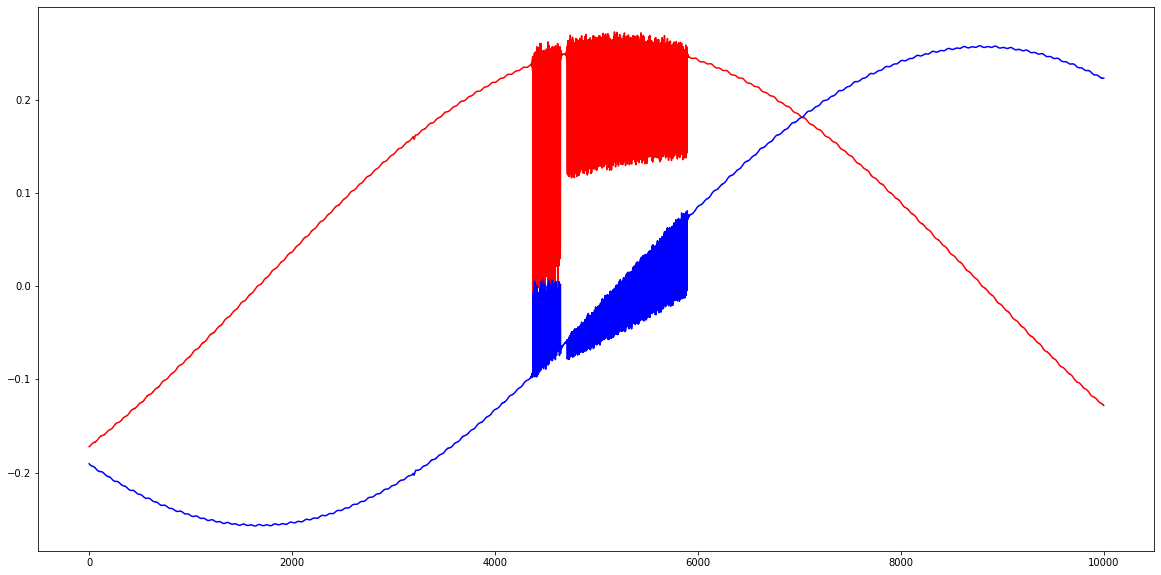

In [18]:
s = signals[0][1][10000:20000]

plt.figure(figsize=(20, 10))
plt.plot(np.real(s), np.imag(s))
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(np.real(s), 'r-', np.imag(s), 'b-')
plt.show()

In [6]:
def normalize_amplitude(signal):
    """Normalize both components of the signal in the range [-1,1]
    :param signal: The I/Q signal to be normalized
    :return: The I/Q signal in the same format as before, but with both components normalized in the range [-1,1]
    """
    real = np.real(signal)
    imag = np.imag(signal)
    max_val = abs(max(max(real.max(), imag.max()),
                      min(real.min(), imag.min()),
                      key=abs))

    # Convert the normalized lists to complex
    return (real / max_val) + 1j * (imag / max_val)

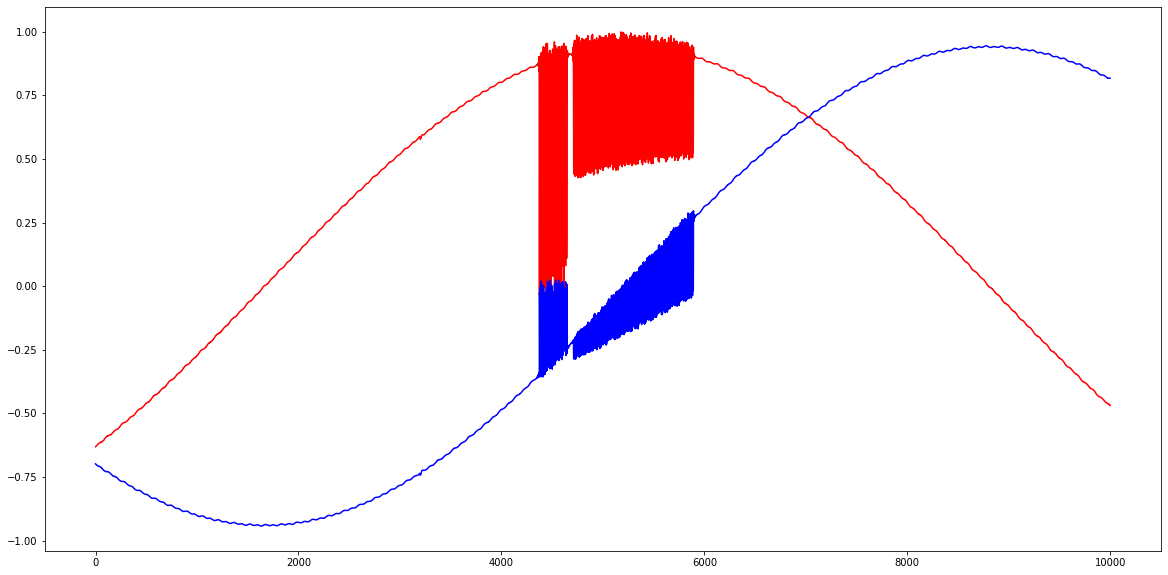

In [8]:
ff = normalize_amplitude(signals[0][1][10000:20000])
plt.figure(figsize=(20, 10))
plt.plot(np.real(ff), 'r-', np.imag(ff), 'b-')
plt.show()

## Only keep segments that contain peaks

In [43]:
def partition(lst, n):
    """Generate as many n-sized segments as possible from lst (the last segment may be smaller).
    :param lst: The list to partition
    :param n: The partition size
    :return: A generator of partitions of size n
    """
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [44]:
peak_segments = []

for signal in signals:
    segments = partition(signal[1], 256)
    peak_segments.append(s := [segment for segment in segments if np.min(np.abs(segment)) < 0.2])
    print(len(s))

147
153
147
146
144
145
147
145
145
143
145
154
143
146
147
145
168
129
169
171
175
165
165
132
2409
8885
155


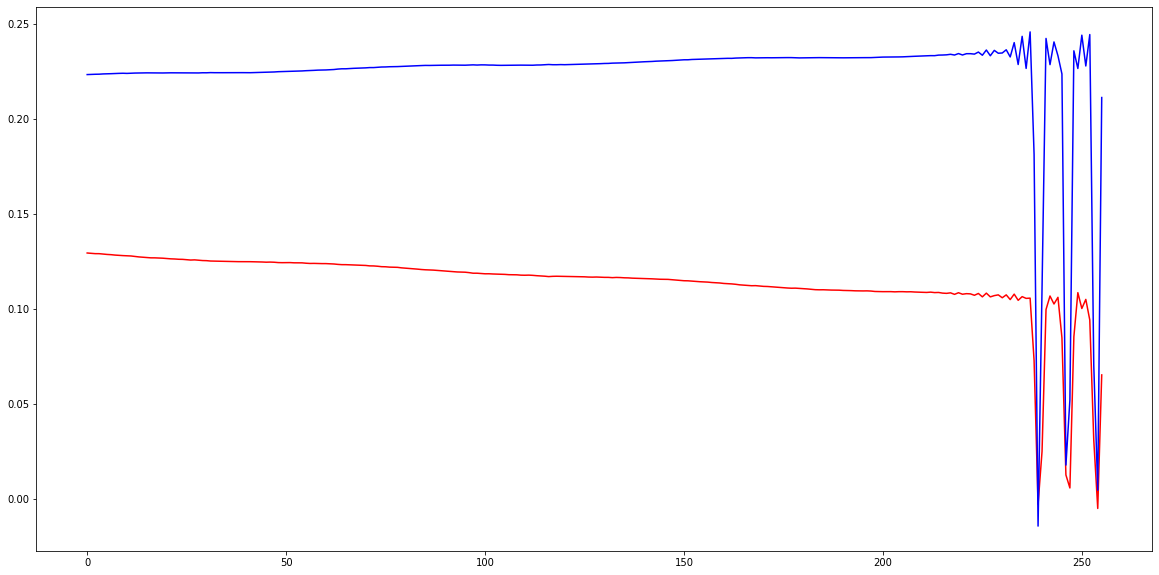

In [48]:
for i in range(1):
    plt.figure(figsize=(20, 10))
    plt.plot(np.real(peak_segments[2][i]), 'r-', np.imag(peak_segments[2][i]), 'b-')
    plt.show()

In [15]:
def segments_peaks(signal, segments_size):
    mags = np.abs(signal)
    indices = np.where(mags < 0.25)[0]
    segments = []

    while indices.size != 0:
        start = indices[0]
        indices = indices[segments_size:]
        segments.append(signal[start:start + segments_size])

    return list(zip(np.real(segments), np.imag(segments)))

In [10]:
def segments_peaks2(signal, segments_size, prominence=0.05):
    mags = np.abs(signal)
    indices = sig.find_peaks(mags, height=0.15, prominence=prominence)[0]
    segments = []

    while indices.size != 0:
        start = indices[0]
        indices = indices[segments_size:]
        segments.append(signal[start:start + segments_size])

    return list(zip(list(np.real(segments)), list(np.imag(segments))))

In [16]:
for idx, signal in enumerate(signals):
    print(idx, len(segments_peaks(signal[1], 256)))

0 66
1 69
2 68
3 66
4 67
5 65
6 65
7 67
8 68
9 67
10 65
11 69
12 66
13 70
14 66
15 42
16 48
17 48
18 43
19 44
20 42
21 43
22 42
23 43
24 8684
25 8947
26 8944


In [13]:
for idx, signal in enumerate(signals):
    print(idx, len(segments_peaks2(signal[1], 256)))

0 14
1 14
2 14
3 14
4 14
5 14
6 14
7 14
8 14
9 14
10 14
11 14
12 14
13 14
14 14
15 11
16 11
17 11
18 11
19 11
20 12
21 11
22 11
23 11
24 28
25 27
26 27


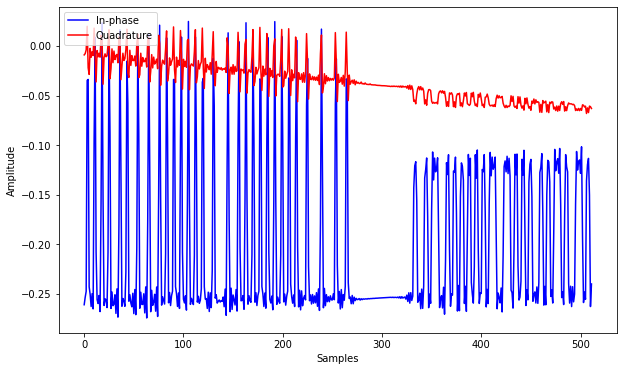

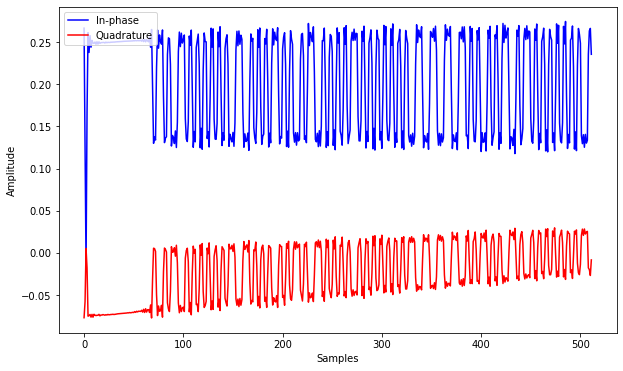

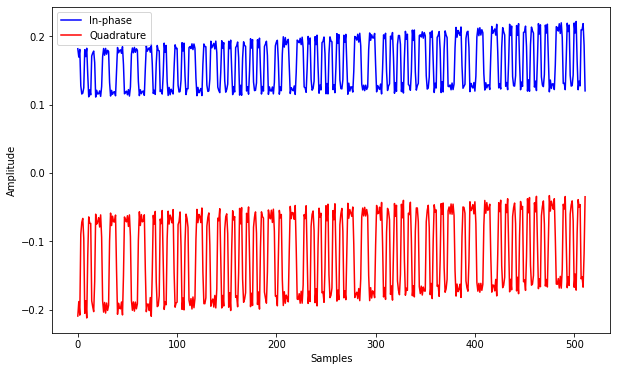

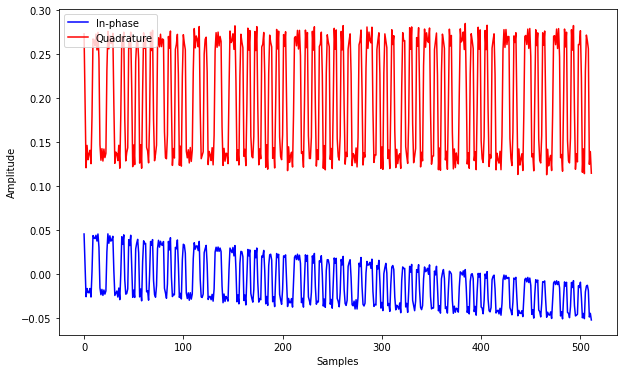

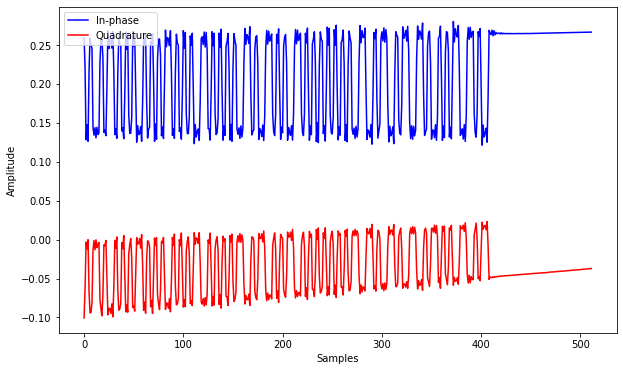

In [12]:
for i in range(5):
    windows = segments_peaks2(signals[5][1], 512)
    plt.figure(figsize=(10, 6))
    plt.plot(windows[i][0], 'b-', label="In-phase")
    plt.plot(windows[i][1], 'r-', label="Quadrature")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend(loc="upper left")
    plt.show()

In [37]:
def cwts(signal):
    cwt = sig.cwt(signal, sig.morlet2, np.arange(1, 31))
    print(cwt)
    plt.figure(figsize=(10, 6))
    plt.imshow(abs(cwt),
               extent=[-1, 1, 1, 31],
               cmap='PRGn',
               aspect='auto',
               vmax=abs(cwt).max(),
               vmin=-abs(cwt).max())
    plt.show()

[[ 0.10896236+0.16086096j  0.25105605+0.05349088j  0.23976674-0.05458006j
  ...  0.12924406-0.13167977j -0.01026521-0.02530275j
   0.11075051+0.0698998j ]
 [-0.01698726+0.07086222j -0.01073576-0.06568017j  0.02612185+0.05837349j
  ... -0.06099089-0.05213108j  0.10397927-0.02288071j
  -0.06170304+0.10719899j]
 [ 0.04995681+0.07318665j -0.06820829+0.07021177j -0.09118706-0.05723681j
  ...  0.02060495-0.11242852j  0.11928132+0.03745752j
  -0.05289818+0.11296826j]
 ...
 [-0.01345047+0.14484968j -0.03785098+0.13975886j -0.06082013+0.13041j
  ... -0.06491778-0.17145569j -0.03484356-0.18082558j
  -0.00347116-0.18466747j]
 [-0.01090951+0.14647845j -0.03466807+0.14205619j -0.057188  +0.13363966j
  ... -0.0616468 -0.1749366j  -0.03220205-0.18348243j
  -0.00161799-0.18683041j]
 [-0.00834914+0.14868266j -0.03161334+0.14490248j -0.05381478+0.13734772j
  ... -0.05845351-0.17876856j -0.02953359-0.18653314j
   0.00037878-0.18938879j]]


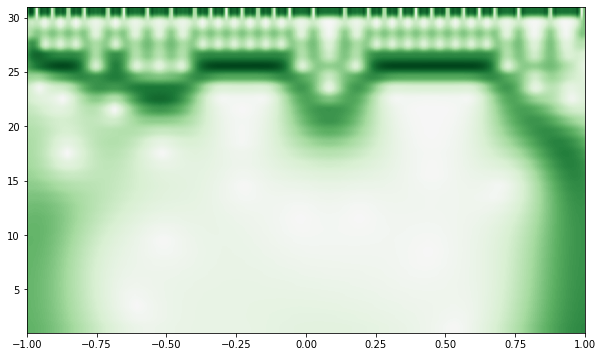

[[ 0.00402585+0.00539717j  0.009249  +0.00042714j  0.00644618-0.00817503j
  ...  0.00278298-0.02219296j -0.00674106+0.01759177j
   0.03883385+0.0187064j ]
 [-0.00202279+0.00060763j  0.00507238-0.00096639j -0.00827893+0.00666651j
  ... -0.00509636-0.02000376j  0.0226173 +0.00842368j
  -0.02148128+0.01481337j]
 [ 0.0053297 +0.00892656j -0.01240595+0.00703909j -0.00821492-0.01616085j
  ...  0.01844823-0.02522949j  0.02569152+0.02324028j
  -0.02606055+0.02335878j]
 ...
 [ 0.00127489+0.00599051j  0.00025477+0.00611752j -0.00077008+0.00606426j
  ... -0.01086   -0.02217399j -0.00694584-0.02380038j
  -0.00279151-0.0247033j ]
 [ 0.00131731+0.00617077j  0.00030281+0.00630486j -0.0007189 +0.00626576j
  ... -0.01052354-0.02268671j -0.00667761-0.02420749j
  -0.00261441-0.02504504j]
 [ 0.00134176+0.00635525j  0.00033126+0.00649311j -0.00068809+0.00646394j
  ... -0.01018701-0.02322771j -0.00639956-0.02464739j
  -0.00241613-0.02541957j]]


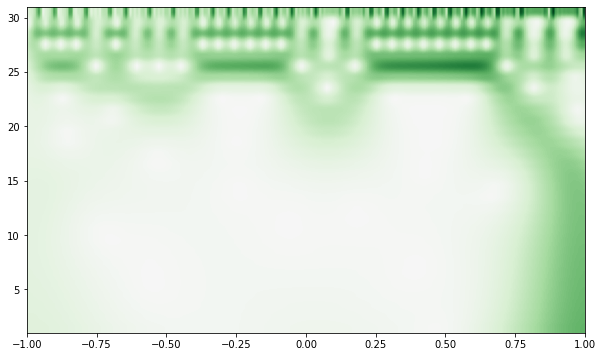

[[-0.06180325-0.09136856j -0.1379512 -0.03200879j -0.12780132-0.0010429j
  ... -0.14625332+0.00770068j -0.12981371+0.03151571j
  -0.10443209+0.04509347j]
 [ 0.00183092-0.04518231j  0.02438098+0.03298502j -0.02901974-0.00729948j
  ...  0.00619683-0.01285166j -0.00900003+0.01658093j
   0.00641772-0.02575214j]
 [ 0.00188707-0.04046019j  0.03590903+0.00394145j -0.00547495+0.02741257j
  ... -0.01378913+0.00365555j -0.00140945-0.01782446j
   0.02177942+0.00088286j]
 ...
 [ 0.00946913-0.11088839j  0.0284114 -0.10769463j  0.04649005-0.10115093j
  ...  0.07063338+0.0996607j   0.05251034+0.11047387j
   0.03273886+0.11787665j]
 [ 0.01051895-0.11178935j  0.0289683 -0.10850466j  0.04657295-0.10206466j
  ...  0.0707164 +0.10114757j  0.05292245+0.11168035j
   0.03356901+0.11896964j]
 [ 0.01123399-0.11248266j  0.029177  -0.10917049j  0.04630361-0.10288975j
  ...  0.07055444+0.10215855j  0.05316537+0.11241769j
   0.03429318+0.11960366j]]


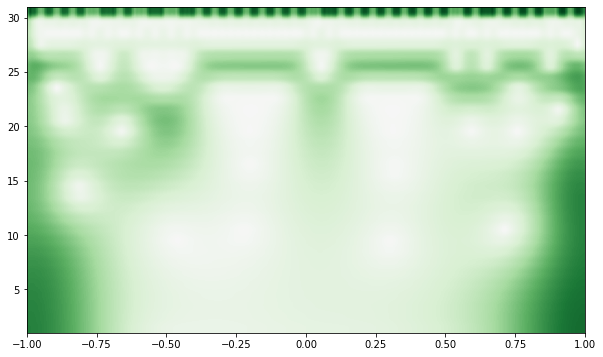

[[ 9.32797433e-02+0.1348953j   2.02864084e-01+0.04374027j
   1.87269430e-01+0.00122526j ...  1.77203223e-01-0.01965042j
   1.28822472e-01-0.06953071j  6.70570063e-02-0.0519081j ]
 [-3.93942881e-03+0.0711476j  -4.03072164e-02-0.05526783j
   5.54001499e-02+0.01291611j ... -1.18250856e-02+0.03321989j
   3.77042322e-05-0.0359833j   1.10628124e-02+0.03164366j]
 [-5.61567379e-03+0.05350281j -4.36931957e-02-0.00883004j
   1.10442358e-02-0.02863144j ... -7.07065612e-04-0.00688206j
   3.90387394e-03-0.00221175j  1.03133831e-03+0.00116172j]
 ...
 [-2.86869317e-02+0.14504273j -5.36000253e-02+0.13825527j
  -7.69602785e-02+0.12704159j ... -8.32544070e-02-0.09442619j
  -6.54676938e-02-0.10730517j -4.57046146e-02-0.11676161j]
 [-3.16736578e-02+0.14469083j -5.56943651e-02+0.1375283j
  -7.81418645e-02+0.12623588j ... -8.44865338e-02-0.0941647j
  -6.71993073e-02-0.10696852j -4.79943169e-02-0.11652532j]
 [-3.37366480e-02+0.14382801j -5.68067328e-02+0.13647573j
  -7.83176150e-02+0.12528697j ... -8.5129829

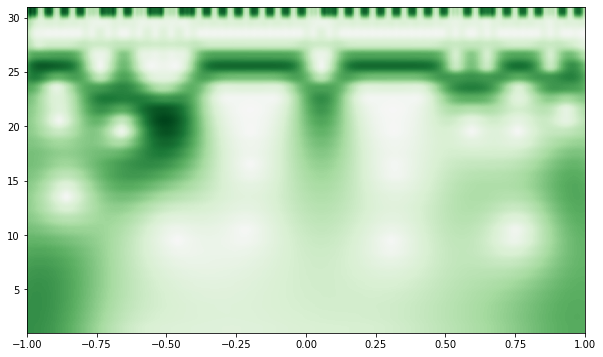

In [40]:
windows = segments_peaks2(signals[5][1], 256)

cwts(np.real(windows[0][0]))
cwts(np.real(windows[0][1]))

cwts(np.real(windows[1][0]))
cwts(np.real(windows[1][1]))

(30, 256)


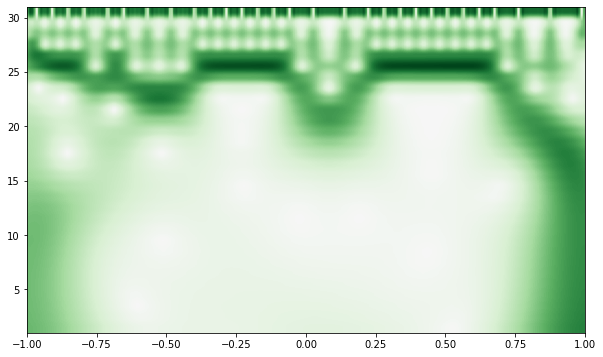

In [34]:
cwt = sig.cwt(windows[0][0], sig.morlet2, np.arange(1, 31))
cwt = cwt + sig.cwt(windows[0][1], sig.morlet2, np.arange(1, 31))
print(cwt.shape)
plt.figure(figsize=(10, 6))
plt.imshow(abs(cwt),
           extent=[-1, 1, 1, 31],
           cmap='PRGn',
           aspect='auto',
           vmax=abs(cwt).max(),
           vmin=-abs(cwt).max())
plt.show()